<a href="https://colab.research.google.com/github/gsfreitas/data_science/blob/main/Spark_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

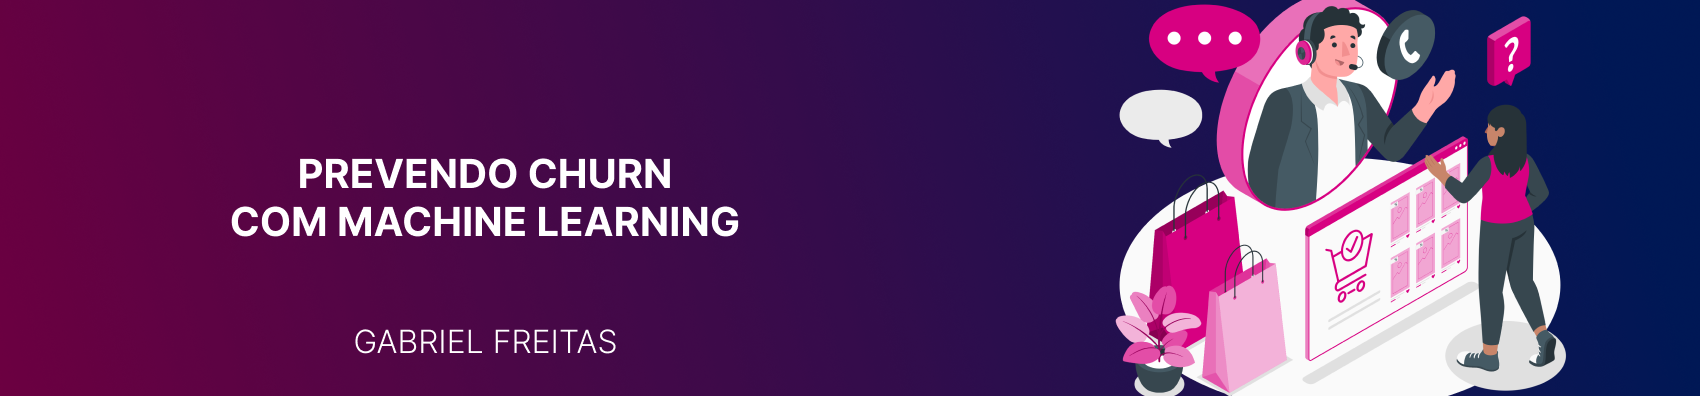

# Preparando os dados

In [ ]:
# instalando o spark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 15.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=d9a47f757f530538f6b7f6344189fb6b85dfe39366420076b99fc2683eb79864
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [ ]:
# iniciando uma sessão no spark
from pyspark.sql import SparkSession

spark = SparkSession.builder.master('local[*]').appName('Classificação com Spark').getOrCreate()

In [ ]:
# lendo o dataset
dados = spark.read.csv('dados_clientes.csv',sep=',',header=True,inferSchema=True)

In [ ]:
# visualização dos dados
dados.show()

+---+-----+----------+-------+-----------+---------------+------------+------------------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+------------+------------+----------------+-------------+
| id|Churn|Mais65anos|Conjuge|Dependentes|MesesDeContrato|TelefoneFixo|MaisDeUmaLinhaTelefonica|   Internet|   SegurancaOnline|      BackupOnline| SeguroDispositivo|    SuporteTecnico|           TVaCabo|   StreamingFilmes|TipoContrato|ContaCorreio| MetodoPagamento|MesesCobrados|
+---+-----+----------+-------+-----------+---------------+------------+------------------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+------------+------------+----------------+-------------+
|  0|  Nao|         0|    Sim|        Nao|              1|         Nao|    SemServicoTelefonico|        DSL|               Nao|               Sim|              

In [ ]:
# agrupamento dos dados
dados.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|  Sim| 5174|
|  Nao| 5174|
+-----+-----+



In [ ]:
# mostra o schema dos dados
dados.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Churn: string (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- Conjuge: string (nullable = true)
 |-- Dependentes: string (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- TelefoneFixo: string (nullable = true)
 |-- MaisDeUmaLinhaTelefonica: string (nullable = true)
 |-- Internet: string (nullable = true)
 |-- SegurancaOnline: string (nullable = true)
 |-- BackupOnline: string (nullable = true)
 |-- SeguroDispositivo: string (nullable = true)
 |-- SuporteTecnico: string (nullable = true)
 |-- TVaCabo: string (nullable = true)
 |-- StreamingFilmes: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- ContaCorreio: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)



Tratamento dos dados

In [ ]:
# separar as colunas binárias
colunasBinarias = [
    'Churn',
    'Conjuge',
    'Dependentes',
    'TelefoneFixo',
    'MaisDeUmaLinhaTelefonica',
    'SegurancaOnline',
    'BackupOnline',
    'SeguroDispositivo',
    'SuporteTecnico',
    'TVaCabo',
    'StreamingFilmes',
    'ContaCorreio'
]

In [ ]:
from pyspark.sql import functions as f

In [ ]:
# criando regra para transformação dos dados
todasColunas = [f.when(f.col(c)=='Sim',1).otherwise(0).alias(c) for c in colunasBinarias]

In [ ]:
# os dados binários ficarão no final, por isso usamos reversed
for coluna in reversed(dados.columns):
  if coluna not in colunasBinarias:
    todasColunas.insert(0,coluna) # insere na primeira pos e recebe coluna como valor

todasColunas

['id',
 'Mais65anos',
 'MesesDeContrato',
 'Internet',
 'TipoContrato',
 'MetodoPagamento',
 'MesesCobrados',
 Column<'CASE WHEN (Churn = Sim) THEN 1 ELSE 0 END AS Churn'>,
 Column<'CASE WHEN (Conjuge = Sim) THEN 1 ELSE 0 END AS Conjuge'>,
 Column<'CASE WHEN (Dependentes = Sim) THEN 1 ELSE 0 END AS Dependentes'>,
 Column<'CASE WHEN (TelefoneFixo = Sim) THEN 1 ELSE 0 END AS TelefoneFixo'>,
 Column<'CASE WHEN (MaisDeUmaLinhaTelefonica = Sim) THEN 1 ELSE 0 END AS MaisDeUmaLinhaTelefonica'>,
 Column<'CASE WHEN (SegurancaOnline = Sim) THEN 1 ELSE 0 END AS SegurancaOnline'>,
 Column<'CASE WHEN (BackupOnline = Sim) THEN 1 ELSE 0 END AS BackupOnline'>,
 Column<'CASE WHEN (SeguroDispositivo = Sim) THEN 1 ELSE 0 END AS SeguroDispositivo'>,
 Column<'CASE WHEN (SuporteTecnico = Sim) THEN 1 ELSE 0 END AS SuporteTecnico'>,
 Column<'CASE WHEN (TVaCabo = Sim) THEN 1 ELSE 0 END AS TVaCabo'>,
 Column<'CASE WHEN (StreamingFilmes = Sim) THEN 1 ELSE 0 END AS StreamingFilmes'>,
 Column<'CASE WHEN (ContaCorr

In [ ]:
dados.select(todasColunas).show()

+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
| id|Mais65anos|MesesDeContrato|   Internet|TipoContrato| MetodoPagamento|MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|
+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
|  0|         0|              1|        DSL| Mensalmente|BoletoEletronico|        29.85|    0|      1|          0|           0|                       0|              0|           1|                0|             0|      0|              0|      

In [ ]:
dataset = dados.select(todasColunas)

In [ ]:
dataset.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- Internet: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)
 |-- Churn: integer (nullable = false)
 |-- Conjuge: integer (nullable = false)
 |-- Dependentes: integer (nullable = false)
 |-- TelefoneFixo: integer (nullable = false)
 |-- MaisDeUmaLinhaTelefonica: integer (nullable = false)
 |-- SegurancaOnline: integer (nullable = false)
 |-- BackupOnline: integer (nullable = false)
 |-- SeguroDispositivo: integer (nullable = false)
 |-- SuporteTecnico: integer (nullable = false)
 |-- TVaCabo: integer (nullable = false)
 |-- StreamingFilmes: integer (nullable = false)
 |-- ContaCorreio: integer (nullable = false)



Criando Dummies

In [ ]:
dados.select(['Internet','TipoContrato','MetodoPagamento']).show()

+-----------+------------+----------------+
|   Internet|TipoContrato| MetodoPagamento|
+-----------+------------+----------------+
|        DSL| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|          Boleto|
|        DSL| Mensalmente|          Boleto|
|        DSL|       UmAno|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|   CartaoCredito|
|        DSL| Mensalmente|          Boleto|
|FibraOptica| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|   DebitoEmConta|
|        DSL| Mensalmente|          Boleto|
|        Nao|    DoisAnos|   CartaoCredito|
|FibraOptica|       UmAno|   CartaoCredito|
|FibraOptica| Mensalmente|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica|    DoisAnos|   CartaoCredito|
|        Nao|       UmAno|          Boleto|
|FibraOptica|    DoisAnos|   DebitoEmConta|
|        DSL| Mensalmente|   CartaoCredito|
|FibraOptica| Mensalmente|Boleto

In [ ]:
dataset.groupBy('id').pivot('Internet').agg(f.lit(1)).na.fill(0).show()

+----+---+-----------+---+
|  id|DSL|FibraOptica|Nao|
+----+---+-----------+---+
|7982|  1|          0|  0|
|9465|  0|          1|  0|
|2122|  1|          0|  0|
|3997|  1|          0|  0|
|6654|  0|          1|  0|
|7880|  0|          1|  0|
|4519|  0|          1|  0|
|6466|  0|          1|  0|
| 496|  1|          0|  0|
|7833|  0|          1|  0|
|1591|  0|          0|  1|
|2866|  0|          1|  0|
|8592|  0|          1|  0|
|1829|  0|          1|  0|
| 463|  0|          1|  0|
|4900|  0|          1|  0|
|4818|  0|          1|  0|
|7554|  1|          0|  0|
|1342|  0|          0|  1|
|5300|  0|          1|  0|
+----+---+-----------+---+
only showing top 20 rows



In [ ]:
# criando variáveis dummies para cada coluna multicategórica
Internet = dataset.groupBy('id').pivot('Internet').agg(f.lit(1)).na.fill(0)
TipoContrato = dataset.groupBy('id').pivot('TipoContrato').agg(f.lit(1)).na.fill(0)
MetodoPagamento = dataset.groupBy('id').pivot('MetodoPagamento').agg(f.lit(1)).na.fill(0)

In [ ]:
# juntando as tabelas e removendo as colunas desnecessárias
dataset = dataset\
  .join(Internet,'id',how='inner')\
  .join(TipoContrato,'id',how='inner')\
  .join(MetodoPagamento,'id',how='inner')\
  .select(
      '*',
      f.col('DSL').alias('Internet_DSL'),
      f.col('FibraOptica').alias('Internet_FibraOptica'),
      f.col('Nao').alias('Internet_Nao'),
      f.col('Mensalmente').alias('TipoContrato_Mensalmente'),
      f.col('UmAno').alias('TipoContrato_UmAno'),
      f.col('DoisAnos').alias('TipoContrato_DoisAnos'),
      f.col('DebitoEmConta').alias('MetodoPagamento_DebitoEmConta'),
      f.col('CartaoCredito').alias('MetodoPagamento_CartaoCredito'),
      f.col('BoletoEletronico').alias('MetodoPagamento_BoletoEletronico'),
      f.col('Boleto').alias('MetodoPagamento_Boleto')
    )\
    .drop(
        'Internet','TipoContrato','MetodoPagamento','DSL',
        'FibraOptica','Nao','Mensalmente','UmAno','DoisAnos',
        'DebitoEmConta','CartaoCredito','BoletoEletronico','Boleto'
    )

In [ ]:
# visualizando o novo dataset
dataset.show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

In [ ]:
# print do schema do dataset
dataset.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- MesesCobrados: double (nullable = true)
 |-- Churn: integer (nullable = false)
 |-- Conjuge: integer (nullable = false)
 |-- Dependentes: integer (nullable = false)
 |-- TelefoneFixo: integer (nullable = false)
 |-- MaisDeUmaLinhaTelefonica: integer (nullable = false)
 |-- SegurancaOnline: integer (nullable = false)
 |-- BackupOnline: integer (nullable = false)
 |-- SeguroDispositivo: integer (nullable = false)
 |-- SuporteTecnico: integer (nullable = false)
 |-- TVaCabo: integer (nullable = false)
 |-- StreamingFilmes: integer (nullable = false)
 |-- ContaCorreio: integer (nullable = false)
 |-- Internet_DSL: integer (nullable = true)
 |-- Internet_FibraOptica: integer (nullable = true)
 |-- Internet_Nao: integer (nullable = true)
 |-- TipoContrato_Mensalmente: integer (nullable = true)
 |-- TipoContrato_UmAno: integer (nullable = true)
 |-- TipoContr

# Criando o primeiro modelo

In [ ]:
dataset.show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
# mudando a coluna target para o nome ideal que o VectorAssembler espera
dataset = dataset.withColumnRenamed('Churn','label')

In [ ]:
# lista com o nome das colunas que são features
X = dataset.columns
X.remove('label')
X.remove('id')
X

['Mais65anos',
 'MesesDeContrato',
 'MesesCobrados',
 'Conjuge',
 'Dependentes',
 'TelefoneFixo',
 'MaisDeUmaLinhaTelefonica',
 'SegurancaOnline',
 'BackupOnline',
 'SeguroDispositivo',
 'SuporteTecnico',
 'TVaCabo',
 'StreamingFilmes',
 'ContaCorreio',
 'Internet_DSL',
 'Internet_FibraOptica',
 'Internet_Nao',
 'TipoContrato_Mensalmente',
 'TipoContrato_UmAno',
 'TipoContrato_DoisAnos',
 'MetodoPagamento_DebitoEmConta',
 'MetodoPagamento_CartaoCredito',
 'MetodoPagamento_BoletoEletronico',
 'MetodoPagamento_Boleto']

In [ ]:
# input: dados de entrada
# output: nome dado a coluna única com o vetor de características

assembler = VectorAssembler(inputCols=X,outputCol='features')

In [ ]:
dataset_prep = assembler.transform(dataset).select('features','label')

In [ ]:
dataset_prep.show(10,truncate=False)

+-----------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                   |label|
+-----------------------------------------------------------------------------------------------------------+-----+
|(24,[1,2,11,12,13,14,17,22],[1.0,45.30540797610398,1.0,1.0,1.0,1.0,1.0,1.0])                               |1    |
|(24,[1,2,3,5,6,8,9,11,12,13,15,17,22],[60.0,103.6142230120257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|1    |
|(24,[1,2,5,6,10,11,12,13,14,18,23],[12.0,75.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                       |0    |
|(24,[1,2,3,5,8,12,13,14,19,21],[69.0,61.45,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                               |0    |
|(24,[1,2,3,5,6,11,13,15,17,22],[7.0,86.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                 |1    |
|(24,[1,2,5,6,12,13,15,17,22],[14.0,85.03742670311915,1.0,1.0,1.0,1.0,1.

Ajuste e previsão

In [ ]:
# cria a variável seed, para garantir a reprodutibilidade dos resultados
SEED=101

In [ ]:
# separa os dados de treino e teste na proporção 70/30
treino, teste = dataset_prep.randomSplit([0.7,0.3], seed=SEED)

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
# cria o objeto regressor
lr = LogisticRegression()

In [ ]:
# cria o modelo Logistic Regression para treino e ajusta os dados
modelo_lr = lr.fit(treino)

In [ ]:
previsoes_lr_treino = modelo_lr.transform(treino)

In [ ]:
# cria as previsoes com os dados de teste
previsoes_lr_teste = modelo_lr.transform(teste)

In [ ]:
# visualização da previsão
previsoes_lr_teste.show(truncate=0)

+------------------------------------------------------------------------------------------------------+-----+------------------------------------------+-----------------------------------------+----------+
|features                                                                                              |label|rawPrediction                             |probability                              |prediction|
+------------------------------------------------------------------------------------------------------+-----+------------------------------------------+-----------------------------------------+----------+
|(24,[0,1,2,3,4,5,6,7,9,10,11,14,18,22],[1.0,55.0,76.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])  |0    |[3.0217417975155163,-3.0217417975155163]  |[0.9535467400028285,0.04645325999717154] |0.0       |
|(24,[0,1,2,3,4,5,6,7,13,15,17,22],[1.0,24.0,79.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])               |0    |[-0.09221929660763595,0.09221929660763595]|[0.4769615009160580

Métricas

In [ ]:
# resumo do modelo de treino
resumo_lr_treino = modelo_lr.summary

In [ ]:
print("Acurária: %f" % resumo_lr_treino.accuracy)
print("Precisão: %f" % resumo_lr_treino.precisionByLabel[1])
print("Recall: %f" % resumo_lr_treino.recallByLabel[1])
print("F1: %f" % resumo_lr_treino.fMeasureByLabel()[1])

Acurária: 0.784901
Precisão: 0.770686
Recall: 0.812517
F1: 0.791049


In [ ]:
# contagem de verdadeiros e negativos
tp = previsoes_lr_teste.select('label','prediction').where((f.col('label')==1) & (f.col('prediction')==1)).count()
tn = previsoes_lr_teste.select('label','prediction').where((f.col('label')==0) & (f.col('prediction')==0)).count()
fp = previsoes_lr_teste.select('label','prediction').where((f.col('label')==0) & (f.col('prediction')==1)).count()
fn = previsoes_lr_teste.select('label','prediction').where((f.col('label')==1) & (f.col('prediction')==0)).count()

In [ ]:
print(tp,tn,fp,fn)

1256 1179 400 307


In [ ]:
from pyspark.sql import functions as f # importo a biblioteca functions

# crio a função que vai receber os dados para serem avaliados
def calcula_mostra_metricas(modelo_lr, df_transform_modelo, normalize=False, percentage=True):
# os passos para montagem da matriz de confusão são os mesmos da aula
  tp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
  tn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
  fp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
  fn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()

  valorP = 1
  valorN = 1

  if normalize:
    valorP = tp + fn
    valorN = fp + tn

  if percentage and normalize:
    valorP = valorP / 100
    valorN = valorN / 100

  # ‘s’ será minha string de retorno
  # ela vai coletar e montar minha matriz de confusão
  # e também os valores de acurácia, precisão, recall e F1-score
  s = ''

  # construção da minha string da matriz de confusão  
  s += ' '*20 + 'Previsto\n'
  s += ' '*15 +  'Churn' + ' '*5 + 'Não-Churn\n'
  s += ' '*4 + 'Churn' + ' '*6 +  str(int(tp/valorP)) + ' '*7 + str(int(fn/valorP)) + '\n'
  s += 'Real\n'
  s += ' '*4 + 'Não-Churn' + ' '*2 + str(int(fp/valorN)) +  ' '*7 + str(int(tn/valorN))  + '\n'
  s += '\n'

  # coleto o resumo das métricas com summary
  resumo_lr_treino = modelo_lr.summary

  # adiciono os valores de cada métrica a minha string de retorno
  s += f'Acurácia: {resumo_lr_treino.accuracy}\n'
  s += f'Precisão: {resumo_lr_treino.precisionByLabel[1]}\n'
  s += f'Recall: {resumo_lr_treino.recallByLabel[1]}\n'
  s += f'F1: {resumo_lr_treino.fMeasureByLabel()[1]}\n'

  return s

In [ ]:
print(calcula_mostra_metricas(modelo_lr,previsoes_lr_teste,normalize=False))

                    Previsto
               Churn     Não-Churn
    Churn      1256       307
Real
    Não-Churn  400       1179

Acurácia: 0.7849014709963918
Precisão: 0.7706855791962175
Recall: 0.8125173082248685
F1: 0.7910488002156916



# Avaliando o Novo Modelo

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
# criando o objeto regressor
dtc = DecisionTreeClassifier()

In [ ]:
# criando o modelo
modelo_dtc = dtc.fit(treino)

In [ ]:
# criando as previsoes para o modelo de teste
previsoes_dtc_treino = modelo_dtc.transform(treino)

In [ ]:
# visualizando os dados
previsoes_dtc_treino.show(truncate=False)

+------------------------------------------------------------------------------------------------------+-----+--------------+---------------------------------------+----------+
|features                                                                                              |label|rawPrediction |probability                            |prediction|
+------------------------------------------------------------------------------------------------------+-----+--------------+---------------------------------------+----------+
|(24,[0,1,2,3,4,5,6,7,8,10,13,15,18,20],[1.0,58.0,89.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])  |0    |[2056.0,334.0]|[0.8602510460251046,0.1397489539748954]|0.0       |
|(24,[0,1,2,3,4,5,6,7,8,11,14,18,22],[1.0,71.0,69.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])          |0    |[2056.0,334.0]|[0.8602510460251046,0.1397489539748954]|0.0       |
|(24,[0,1,2,3,4,5,6,7,8,12,13,15,17,22],[1.0,60.0,93.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])  |0    |[22.0

Métricas

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# instanciando o avaliador
evaluator = MulticlassClassificationEvaluator()

In [ ]:
# avaliando a previsao de treino
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_treino,{evaluator.metricName: 'accuracy'}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_treino,{evaluator.metricName: 'precisionByLabel'}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_treino,{evaluator.metricName: 'recallByLabel'}))
print("F1-Score: %f" % evaluator.evaluate(previsoes_dtc_treino,{evaluator.metricName: 'fMeasureByLabel'}))

Acurácia: 0.791701
Precisão: 0.779349
Recall: 0.812517
F1-Score: 0.795588


In [ ]:
# previsoes com dados de teste
previsoes_dtc_teste = modelo_dtc.transform(teste)

In [ ]:
previsoes_dtc_teste.show(truncate=False)

+------------------------------------------------------------------------------------------------------+-----+--------------+----------------------------------------+----------+
|features                                                                                              |label|rawPrediction |probability                             |prediction|
+------------------------------------------------------------------------------------------------------+-----+--------------+----------------------------------------+----------+
|(24,[0,1,2,3,4,5,6,7,9,10,11,14,18,22],[1.0,55.0,76.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])  |0    |[2056.0,334.0]|[0.8602510460251046,0.1397489539748954] |0.0       |
|(24,[0,1,2,3,4,5,6,7,13,15,17,22],[1.0,24.0,79.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])               |0    |[62.0,128.0]  |[0.3263157894736842,0.6736842105263158] |1.0       |
|(24,[0,1,2,3,4,5,6,8,13,15,17,23],[1.0,34.0,79.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                |1    |

In [ ]:
print('Decicion Tree Classifier')
print('='*40)
print('Dados de Treino')
print('='*40)
print('Matriz de Confusão')
print('-'*40)
calcula_mostra_matriz_confusao(previsoes_dtc_treino,normalize=False)
print("-"*40)
print("Métricas")
print('-'*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_treino,{evaluator.metricName: 'accuracy'}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_treino,{evaluator.metricName: 'precisionByLabel'}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_treino,{evaluator.metricName: 'recallByLabel'}))
print("F1-Score: %f" % evaluator.evaluate(previsoes_dtc_treino,{evaluator.metricName: 'fMeasureByLabel'}))
print("")
print('='*40)
print('Dados de Teste')
print('='*40)
print('Matriz de Confusão')
print('-'*40)
calcula_mostra_matriz_confusao(previsoes_dtc_teste,normalize=False)
print("-"*40)
print("Métricas")
print('-'*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_teste,{evaluator.metricName: 'accuracy'}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_teste,{evaluator.metricName: 'precisionByLabel'}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_teste,{evaluator.metricName: 'recallByLabel'}))
print("F1-Score: %f" % evaluator.evaluate(previsoes_dtc_teste,{evaluator.metricName: 'fMeasureByLabel'}))

Decicion Tree Classifier
Dados de Treino
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        2784         827
Real
     Não-Churn    674         2921
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.791701
Precisão: 0.779349
Recall: 0.812517
F1-Score: 0.795588

Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1181         382
Real
     Não-Churn    336         1243
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.771483
Precisão: 0.764923
Recall: 0.787207
F1-Score: 0.775905


# Random Forest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
# instanciando o Random Forest
rfc = RandomForestClassifier(seed=SEED)

In [ ]:
# criando o modelo
modelo_rfc = rfc.fit(treino)

In [ ]:
# realizando previsoes
previsoes_rfc_treino = modelo_rfc.transform(treino)

In [ ]:
previsoes_rfc_treino.show(truncate=False)

+------------------------------------------------------------------------------------------------------+-----+---------------------------------------+----------------------------------------+----------+
|features                                                                                              |label|rawPrediction                          |probability                             |prediction|
+------------------------------------------------------------------------------------------------------+-----+---------------------------------------+----------------------------------------+----------+
|(24,[0,1,2,3,4,5,6,7,8,10,13,15,18,20],[1.0,58.0,89.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])  |0    |[15.005277346670482,4.99472265332952]  |[0.7502638673335241,0.24973613266647599]|0.0       |
|(24,[0,1,2,3,4,5,6,7,8,11,14,18,22],[1.0,71.0,69.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])          |0    |[16.929504027324917,3.070495972675083] |[0.8464752013662459,0.1535247986337541

Métricas

In [ ]:
# previsoes com dados de teste
previsoes_rfc_teste = modelo_rfc.transform(teste)

In [ ]:
previsoes_rfc_teste.show(truncate=False)

+------------------------------------------------------------------------------------------------------+-----+---------------------------------------+----------------------------------------+----------+
|features                                                                                              |label|rawPrediction                          |probability                             |prediction|
+------------------------------------------------------------------------------------------------------+-----+---------------------------------------+----------------------------------------+----------+
|(24,[0,1,2,3,4,5,6,7,9,10,11,14,18,22],[1.0,55.0,76.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])  |0    |[16.743387167561558,3.2566128324384436]|[0.8371693583780779,0.16283064162192218]|0.0       |
|(24,[0,1,2,3,4,5,6,7,13,15,17,22],[1.0,24.0,79.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])               |0    |[7.273132145996488,12.726867854003515] |[0.36365660729982435,0.636343392700175

Decicion Tree Classifier
Dados de Treino
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        2950         661
Real
     Não-Churn    884         2711
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.785595
Precisão: 0.803974
Recall: 0.754103
F1-Score: 0.778240

Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1257         306
Real
     Não-Churn    416         1163
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.770210
Precisão: 0.791695
Recall: 0.736542
F1-Score: 0.763123


In [ ]:
def report_metrics(name,dados_treino,dados_teste):
  print(name)
  print('='*40)
  print('Dados de Treino')
  print('='*40)
  print('Matriz de Confusão')
  print('-'*40)
  calcula_mostra_matriz_confusao(dados_treino,normalize=False)
  print("-"*40)
  print("Métricas")
  print('-'*40)
  print("Acurácia: %f" % evaluator.evaluate(dados_treino,{evaluator.metricName: 'accuracy'}))
  print("Precisão: %f" % evaluator.evaluate(dados_treino,{evaluator.metricName: 'precisionByLabel'}))
  print("Recall: %f" % evaluator.evaluate(dados_treino,{evaluator.metricName: 'recallByLabel'}))
  print("F1-Score: %f" % evaluator.evaluate(dados_treino,{evaluator.metricName: 'fMeasureByLabel'}))
  print("")
  print('='*40)
  print('Dados de Teste')
  print('='*40)
  print('Matriz de Confusão')
  print('-'*40)
  calcula_mostra_matriz_confusao(dados_teste,normalize=False)
  print("-"*40)
  print("Métricas")
  print('-'*40)
  print("Acurácia: %f" % evaluator.evaluate(dados_teste,{evaluator.metricName: 'accuracy'}))
  print("Precisão: %f" % evaluator.evaluate(dados_teste,{evaluator.metricName: 'precisionByLabel'}))
  print("Recall: %f" % evaluator.evaluate(dados_teste,{evaluator.metricName: 'recallByLabel'}))
  print("F1-Score: %f" % evaluator.evaluate(dados_teste,{evaluator.metricName: 'fMeasureByLabel'}))

In [ ]:
# análise do melhor modelo
report_metrics("Logistic Regression",previsoes_lr_treino,previsoes_lr_teste)

Logistic Regression
Dados de Treino
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        2934         677
Real
     Não-Churn    873         2722
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.784901
Precisão: 0.800824
Recall: 0.757163
F1-Score: 0.778381

Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1256         307
Real
     Não-Churn    400         1179
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.774984
Precisão: 0.793405
Recall: 0.746675
F1-Score: 0.769331


In [ ]:
report_metrics("Decision Tree Classifier",previsoes_dtc_treino,previsoes_dtc_teste)

Decision Tree
Dados de Treino
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        2784         827
Real
     Não-Churn    674         2921
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.791701
Precisão: 0.779349
Recall: 0.812517
F1-Score: 0.795588

Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1181         382
Real
     Não-Churn    336         1243
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.771483
Precisão: 0.764923
Recall: 0.787207
F1-Score: 0.775905


In [ ]:
report_metrics("Random Forest Classifier",previsoes_rfc_treino,previsoes_rfc_teste)

Random Forest Classifier
Dados de Treino
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        2950         661
Real
     Não-Churn    884         2711
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.785595
Precisão: 0.803974
Recall: 0.754103
F1-Score: 0.778240

Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1257         306
Real
     Não-Churn    416         1163
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.770210
Precisão: 0.791695
Recall: 0.736542
F1-Score: 0.763123


# Técnicas de Otimização

In [ ]:
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder

In [ ]:
# instanciando o algoritmo
dtc = DecisionTreeClassifier(seed=SEED)

In [ ]:
# criando o grid
grid = ParamGridBuilder()\
  .addGrid(dtc.maxDepth,[2,5,10])\
  .addGrid(dtc.maxBins,[10,32,45])\
  .build()

In [ ]:
# criando o avaliador
evaluator = MulticlassClassificationEvaluator()

In [ ]:
# cria o modelo de validação cruzada para o decision tree
dtc_cv = CrossValidator(
    estimator=dtc,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [ ]:
# cria o modelo decision tree para os dados de treino
modelo_dtc_cv = dtc_cv.fit(treino)

In [ ]:
# realizando as previsoes com dados de teste
previsoes_dtc_cv_teste = modelo_dtc_cv.transform(teste)

In [ ]:
print('Decicion Tree Classifier Cross Validator')
print('='*40)
print('Dados de Teste')
print('='*40)
print('Matriz de Confusão')
print('-'*40)
calcula_mostra_matriz_confusao(previsoes_dtc_cv_teste,normalize=False)
print("-"*40)
print("Métricas")
print('-'*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_cv_teste,{evaluator.metricName: 'accuracy'}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_cv_teste,{evaluator.metricName: 'precisionByLabel'}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_cv_teste,{evaluator.metricName: 'recallByLabel'}))
print("F1-Score: %f" % evaluator.evaluate(previsoes_dtc_cv_teste,{evaluator.metricName: 'fMeasureByLabel'}))

Decicion Tree Classifier Cross Validator
Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1327         236
Real
     Não-Churn    423         1156
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.790261
Precisão: 0.830460
Recall: 0.732109
F1-Score: 0.778189


In [ ]:
# instanciando o algoritmo
rfc = RandomForestClassifier(seed=SEED)

In [ ]:
# criando o grid
grid = ParamGridBuilder()\
  .addGrid(rfc.maxDepth,[2,5,10])\
  .addGrid(rfc.maxBins,[10,32,45])\
  .addGrid(rfc.numTrees,[10,20,50])\
  .build()

In [ ]:
# criando o avaliador
evaluator = MulticlassClassificationEvaluator()

In [ ]:
# cria o modelo de validação cruzada para o random forest
rfc_cv = CrossValidator(
    estimator=rfc,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [ ]:
# cria o modelo random forest para os dados de treino
modelo_rfc_cv = rfc_cv.fit(treino)

In [ ]:
# realizando as previsoes com dados de teste
previsoes_rfc_cv_teste = modelo_rfc_cv.transform(teste)

In [ ]:
print('Random Forest Classifier Cross Validator')
print('='*40)
print('Dados de Teste')
print('='*40)
print('Matriz de Confusão')
print('-'*40)
calcula_mostra_matriz_confusao(previsoes_rfc_cv_teste,normalize=False)
print("-"*40)
print("Métricas")
print('-'*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_rfc_cv_teste,{evaluator.metricName: 'accuracy'}))
print("Precisão: %f" % evaluator.evaluate(previsoes_rfc_cv_teste,{evaluator.metricName: 'precisionByLabel'}))
print("Recall: %f" % evaluator.evaluate(previsoes_rfc_cv_teste,{evaluator.metricName: 'recallByLabel'}))
print("F1-Score: %f" % evaluator.evaluate(previsoes_rfc_cv_teste,{evaluator.metricName: 'fMeasureByLabel'}))

Random Forest Classifier Cross Validator
Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1322         241
Real
     Não-Churn    347         1232
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.812858
Precisão: 0.836388
Recall: 0.780241
F1-Score: 0.807339


In [ ]:
# treinando o modelo final
melhor_modelo_rfc_cv = modelo_rfc_cv.bestModel

In [ ]:
# coletando os hiperparâmetros
print(f'Profundidade Máxima: {melhor_modelo_rfc_cv.getMaxDepth()}')
print(f'Máx Bins: {melhor_modelo_rfc_cv.getMaxBins()}')
print(f'Número de árvores de decisão: {melhor_modelo_rfc_cv.getNumTrees}')

Profundidade Máxima: 10
Máx Bins: 45
Número de árvores de decisão: 20


In [ ]:
# criando um novo modelo
rfc_tuning = RandomForestClassifier(maxDepth=10,maxBins=45,numTrees=20,seed=SEED)

In [ ]:
modelo_rfc_tuning = rfc_tuning.fit(dataset_prep)

In [ ]:
novo_cliente = [{
 'Mais65anos':0,
 'MesesDeContrato':1,
 'MesesCobrados':45.30540797610398,
 'Conjuge':0,
 'Dependentes':0,
 'TelefoneFixo':0,
 'MaisDeUmaLinhaTelefonica':0,
 'SegurancaOnline':0,
 'BackupOnline':0,
 'SeguroDispositivo':0,
 'SuporteTecnico':0,
 'TVaCabo':1,
 'StreamingFilmes':1,
 'ContaCorreio':1,
 'Internet_DSL':1,
 'Internet_FibraOptica':0,
 'Internet_Nao':0,
 'TipoContrato_Mensalmente':1,
 'TipoContrato_UmAno':0,
 'TipoContrato_DoisAnos':0,
 'MetodoPagamento_DebitoEmConta':0,
 'MetodoPagamento_CartaoCredito':0,
 'MetodoPagamento_BoletoEletronico':1,
 'MetodoPagamento_Boleto':0}]

In [ ]:
novo_cliente = spark.createDataFrame(novo_cliente)
novo_cliente.show()

+------------+-------+------------+-----------+------------+--------------------+------------+----------+------------------------+-----------------+---------------+----------------------+--------------------------------+-----------------------------+-----------------------------+---------------+-----------------+---------------+--------------+-------+------------+---------------------+------------------------+------------------+
|BackupOnline|Conjuge|ContaCorreio|Dependentes|Internet_DSL|Internet_FibraOptica|Internet_Nao|Mais65anos|MaisDeUmaLinhaTelefonica|    MesesCobrados|MesesDeContrato|MetodoPagamento_Boleto|MetodoPagamento_BoletoEletronico|MetodoPagamento_CartaoCredito|MetodoPagamento_DebitoEmConta|SegurancaOnline|SeguroDispositivo|StreamingFilmes|SuporteTecnico|TVaCabo|TelefoneFixo|TipoContrato_DoisAnos|TipoContrato_Mensalmente|TipoContrato_UmAno|
+------------+-------+------------+-----------+------------+--------------------+------------+----------+------------------------+----

In [ ]:
assembler = VectorAssembler(inputCols=X,outputCol='features')

In [ ]:
novo_cliente_prep = assembler.transform(novo_cliente).select('features')

In [ ]:
novo_cliente_prep.show(truncate=False)

+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|(24,[1,2,11,12,13,14,17,22],[1.0,45.30540797610398,1.0,1.0,1.0,1.0,1.0,1.0])|
+----------------------------------------------------------------------------+



In [ ]:
modelo_rfc_tuning.transform(novo_cliente_prep).show()

+--------------------+--------------------+--------------------+----------+
|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|(24,[1,2,11,12,13...|[2.16984156904747...|[0.10849207845237...|       1.0|
+--------------------+--------------------+--------------------+----------+



Criando para o modelo logistic regression

In [ ]:
# instanciando um objeto
lr = LogisticRegression()

In [ ]:
# definindo os hiperparâmetros
grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 1.0])\
    .build()

In [ ]:
lr_cv = CrossValidator(
    estimator=lr,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [ ]:
modelo_lr_cv = lr_cv.fit(treino)

In [ ]:
# realizando as previsoes com dados de teste
previsoes_lr_cv_teste = modelo_lr_cv.transform(teste)

In [ ]:
print('Logistic Regression Cross Validator')
print('='*40)
print('Dados de Teste')
print('='*40)
print('Matriz de Confusão')
print('-'*40)
calcula_mostra_matriz_confusao(previsoes_lr_cv_teste,normalize=False)
print("-"*40)
print("Métricas")
print('-'*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_lr_cv_teste,{evaluator.metricName: 'accuracy'}))
print("Precisão: %f" % evaluator.evaluate(previsoes_lr_cv_teste,{evaluator.metricName: 'precisionByLabel'}))
print("Recall: %f" % evaluator.evaluate(previsoes_lr_cv_teste,{evaluator.metricName: 'recallByLabel'}))
print("F1-Score: %f" % evaluator.evaluate(previsoes_lr_cv_teste,{evaluator.metricName: 'fMeasureByLabel'}))

Logistic Regression Cross Validator
Dados de Teste
Matriz de Confusão
----------------------------------------
                     Previsto
                Churn       Não-Churn
     Churn        1271         292
Real
     Não-Churn    408         1171
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.777212
Precisão: 0.800410
Recall: 0.741609
F1-Score: 0.769888


In [ ]:
# treinando o modelo final
melhor_modelo_lr_cv = modelo_lr_cv.bestModel

In [ ]:
# coletando os hiperparâmetros
print(f'Melhor Reg Param: {melhor_modelo_lr_cv.getRegParam()}')
print(f'Melhor Elastic Net Param: {melhor_modelo_lr_cv.getElasticNetParam()}')

Melhor Reg Param: 0.01
Melhor Elastic Net Param: 1.0


In [ ]:
# criando um novo modelo
lr_tuning = LogisticRegression(regParam=0.01,elasticNetParam=1)

In [ ]:
modelo_lr_tuning = lr_tuning.fit(dataset_prep)

In [ ]:
modelo_rfc_tuning.transform(novo_cliente_prep).show()

+--------------------+--------------------+--------------------+----------+
|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|(24,[1,2,11,12,13...|[2.16984156904747...|[0.10849207845237...|       1.0|
+--------------------+--------------------+--------------------+----------+

